## Using kaggle IPL dataset , predicting the runs scored for the first innings of the match   

In [1]:
# importing essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# reading the dataset

df = pd.read_csv('ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
# Checking dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [4]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [5]:
# checking all the missing values

df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [6]:
# converting the date column datatype as datetime

df['date'] = pd.to_datetime( df['date'] , format ="%Y-%m-%d" )
df['date']

0       2008-04-18
1       2008-04-18
2       2008-04-18
3       2008-04-18
4       2008-04-18
           ...    
76009   2017-05-21
76010   2017-05-21
76011   2017-05-21
76012   2017-05-21
76013   2017-05-21
Name: date, Length: 76014, dtype: datetime64[ns]

In [7]:
# checking value count of each team

df['bat_team'].value_counts()

Mumbai Indians                 10213
Kings XI Punjab                 9219
Chennai Super Kings             9142
Royal Challengers Bangalore     8331
Kolkata Knight Riders           8033
Delhi Daredevils                7152
Rajasthan Royals                6643
Deccan Chargers                 5280
Sunrisers Hyderabad             5216
Pune Warriors                   2448
Gujarat Lions                   1726
Rising Pune Supergiant           994
Kochi Tuskers Kerala             876
Rising Pune Supergiants          741
Name: bat_team, dtype: int64

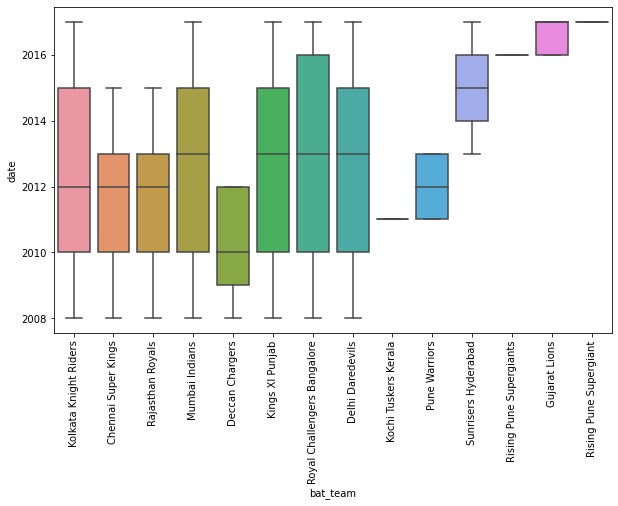

In [8]:
# visualising teams vs year

plt.figure(figsize= (10,6))
sns.boxplot(df['bat_team'] , df['date'].dt.year)
plt.xticks(rotation =90)
plt.show()

In [9]:
# Selecting all those teams that have played majority of the year

teams  = df['bat_team'].value_counts().index [:10]
teams

Index(['Mumbai Indians', 'Kings XI Punjab', 'Chennai Super Kings',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Delhi Daredevils', 'Rajasthan Royals', 'Deccan Chargers',
       'Sunrisers Hyderabad', 'Pune Warriors'],
      dtype='object')

In [10]:
# Selecting the dataframe as per the required teams

df = df[(df['bat_team'].isin(teams) & df['bowl_team'].isin(teams))]
df['bat_team'].value_counts()

Mumbai Indians                 9459
Chennai Super Kings            9020
Kings XI Punjab                8508
Royal Challengers Bangalore    7713
Kolkata Knight Riders          7544
Rajasthan Royals               6530
Delhi Daredevils               6526
Deccan Chargers                5155
Sunrisers Hyderabad            4969
Pune Warriors                  2448
Name: bat_team, dtype: int64

In [11]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [12]:
# there are alot of columns which donot contribute that much
# dropping various columns

df.drop(['mid','batsman', 'bowler' ,'striker','non-striker'] ,1, inplace= True)

df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [13]:
# Selecting only games that were played for atleast 5 overs 

df = df[df['overs'] >= 5]
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [14]:
df['venue'].value_counts()

M Chinnaswamy Stadium                                   4960
Eden Gardens                                            4865
Feroz Shah Kotla                                        4735
Wankhede Stadium                                        4697
MA Chidambaram Stadium, Chepauk                         4384
Rajiv Gandhi International Stadium, Uppal               3984
Punjab Cricket Association Stadium, Mohali              3163
Sawai Mansingh Stadium                                  2976
Subrata Roy Sahara Stadium                              1562
Dr DY Patil Sports Academy                              1463
Kingsmead                                               1291
Sardar Patel Stadium, Motera                            1110
SuperSport Park                                         1024
Brabourne Stadium                                       1024
Himachal Pradesh Cricket Association Stadium             831
New Wanderers Stadium                                    741
Punjab Cricket Associati

In [15]:
# Creating dummies for bat_team , bowl_team & venue

dummy = pd.get_dummies(df[['bat_team','bowl_team', 'venue']] , drop_first=True)
df = pd.concat([df,dummy] , 1)
df.drop(['bat_team','bowl_team', 'venue'] , 1 , inplace = True)

In [16]:
df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Deccan Chargers,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,"venue_Sardar Patel Stadium, Motera",venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Creating X_train & X_test

X_train = df[(df['date'].dt.year <=2016)]
X_test = df[(df['date'].dt.year > 2016)]

y_train  = df[(df['date'].dt.year <= 2016)]['total']
y_test  = df[(df['date'].dt.year >  2016)]['total']

X_train.shape ,X_test.shape , y_train.shape , y_test.shape

((47831, 56), (2778, 56), (47831,), (2778,))

In [18]:
# Dropping date column from X_train & X_test

X_train.drop('date' ,1 ,inplace= True)
X_test.drop('date' ,1 ,inplace= True)

In [19]:
# Using RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=10 , n_estimators= 20 ,random_state=101)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=20, random_state=101)

In [20]:
print('Training accuracy = {}'.format(round(rf.score(X_train,y_train),2)))

Training accuracy = 1.0


In [21]:
print('Test accuracy = {}'.format(round(rf.score(X_test,y_test),2)))

Test accuracy = 1.0


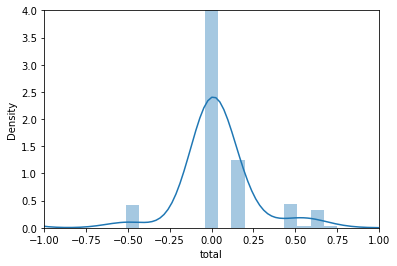

In [22]:
# Predicting on the test set 

y_test_pred = rf.predict(X_test)

sns.distplot(y_test - y_test_pred)
plt.ylim(0,4)
plt.xlim(-1,1)
plt.show()